# Kickstarter Data Analysis
###### Athly Sabish     ---     17 October, 2019

For this project we are looking at a data set of 300,000+ Kickstarter projects. We would like to find out if there are any variables that will help predict if the project will be successful or not. We hypothesize that the set goal and main category will be the best predictors in determining if a project will be successful or not.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date as date

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

%matplotlib inline

c:\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load and Clean Data

In [2]:
raw_data = pd.read_csv("./kickstarter-projects/ks-projects-2018.csv")

In [3]:
raw_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
raw_data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [5]:
pd.value_counts(raw_data["category"].values)

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Length: 159, dtype: int64

In [6]:
pd.value_counts(raw_data["main_category"].values)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
dtype: int64

In [7]:
pd.value_counts(raw_data["currency"].values)

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
dtype: int64

In [8]:
pd.value_counts(raw_data["state"].values)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
dtype: int64

In [9]:
pd.value_counts(raw_data["country"].values)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
dtype: int64

In [10]:
raw_data["main_category"] = raw_data["main_category"].astype("category")
raw_data["main_category"].head()

0      Publishing
1    Film & Video
2    Film & Video
3           Music
4    Film & Video
Name: main_category, dtype: category
Categories (15, object): [Art, Comics, Crafts, Dance, ..., Photography, Publishing, Technology, Theater]

In [11]:
raw_data["currency"] = raw_data["currency"].astype("category").head()
raw_data["currency"].head()

0    GBP
1    USD
2    USD
3    USD
4    USD
Name: currency, dtype: category
Categories (14, object): [AUD, CAD, CHF, DKK, ..., NZD, SEK, SGD, USD]

In [12]:
#raw_data["state"] = raw_data["state"].astype("category").head()
#raw_data["state"].head()

In [13]:
raw_data["country"] = raw_data["country"].astype("category").head()
raw_data["country"].head()

0    GB
1    US
2    US
3    US
4    US
Name: country, dtype: category
Categories (23, object): [AT, AU, BE, CA, ..., NZ, SE, SG, US]

Convert dates in launched and deadline categories to datetime datatypes.

In [14]:
type(raw_data["deadline"][0])

str

In [15]:
raw_data["deadline"].head()

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
Name: deadline, dtype: object

In [16]:
raw_data["launched"].head()

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object

In [17]:
date_format ="%Y-%m-%d"
dt.datetime.strptime(raw_data["deadline"][0], date_format)

datetime.datetime(2015, 10, 9, 0, 0)

In [18]:
converted_deadlines = raw_data["deadline"].map(lambda s: dt.datetime.strptime(s, date_format))
converted_deadlines.head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns]

In [19]:
date_format ="%Y-%m-%d %H:%M:%S"
dt.datetime.strptime(raw_data["launched"][0], date_format)

datetime.datetime(2015, 8, 11, 12, 12, 28)

In [20]:
converted_launches = raw_data["launched"].map(lambda s: dt.datetime.strptime(s, date_format))
converted_launches.head()

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]

In [21]:
dataDF = raw_data[raw_data["state"].isin(["successful", "failed"])]
dataDF["state"].value_counts

<bound method IndexOpsMixin.value_counts of 0             failed
1             failed
2             failed
3             failed
5         successful
             ...    
378654        failed
378657        failed
378658        failed
378659        failed
378660        failed
Name: state, Length: 331675, dtype: object>

In [22]:
dataDF["state"] = dataDF["state"].astype("category")
dataDF["state"].value_counts

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<bound method IndexOpsMixin.value_counts of 0             failed
1             failed
2             failed
3             failed
5         successful
             ...    
378654        failed
378657        failed
378658        failed
378659        failed
378660        failed
Name: state, Length: 331675, dtype: category
Categories (2, object): [failed, successful]>

In [23]:
def calculateDuration(df):
    edoy = df['edy']
    ey = df['ey']
    
    sdoy = df['sdy']
    sy = df['sy']
    
    duration = (365*(ey-sy)+edoy)-sdoy 
    return duration

In [24]:
dataDF['sy'] = converted_launches.map(lambda x: x.year)
dataDF['sm'] = converted_launches.map(lambda x: x.month)
dataDF['sd'] = converted_launches.map(lambda x: x.day)
dataDF['sdy'] = converted_launches.map(lambda x: x.timetuple().tm_yday)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [25]:
dataDF['ey'] = converted_deadlines.map(lambda x: x.year)
dataDF['em'] = converted_deadlines.map(lambda x: x.month)
dataDF['ed'] = converted_deadlines.map(lambda x: x.day)
dataDF['edy'] = converted_deadlines.map(lambda x: x.timetuple().tm_yday)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [26]:
dataDF['duration'] = dataDF.apply(lambda x: calculateDuration(x),axis=1)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dataDF = dataDF.drop(["ID","name","category","goal","pledged","usd pledged","sy","sm","sd","sdy","ey","em","ed","edy"],axis=1)
dataDF.head()

,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,59
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,60
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,45
3,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,30
5,Food,NaN,2016-04-01,2016-02-26 13:38:27,successful,224,NaN,52375.0,50000.00,35


## Analyze the data and variable relationships

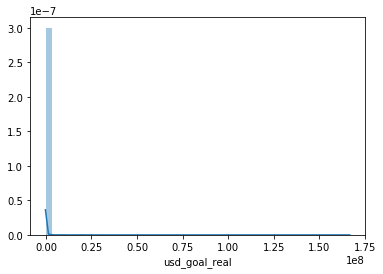

In [30]:
sns.distplot(dataDF["usd_goal_real"])

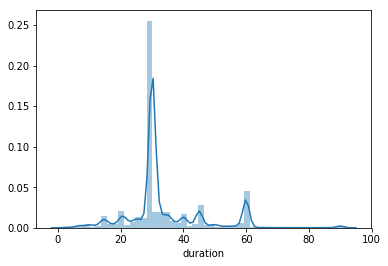

In [31]:
sns.distplot(dataDF["duration"])

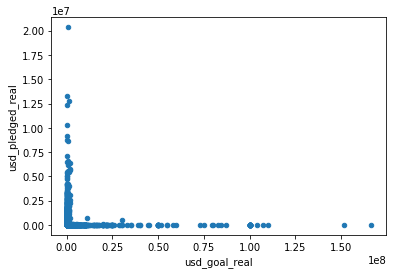

In [32]:
dataDF.plot.scatter(x="usd_goal_real",y="usd_pledged_real")

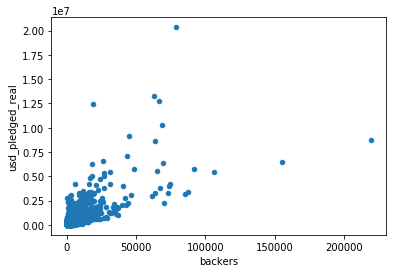

In [33]:
dataDF.plot.scatter(x="backers",y="usd_pledged_real")

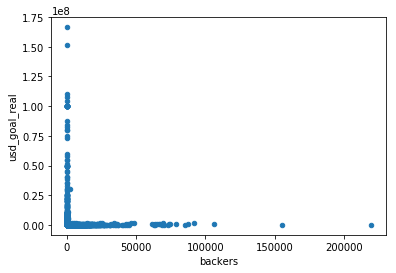

In [34]:
dataDF.plot.scatter(x="backers", y="usd_goal_real")

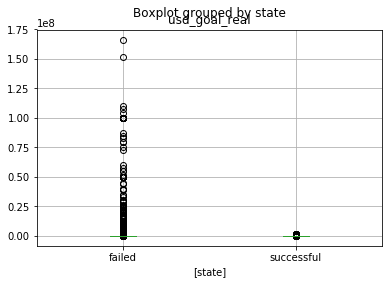

In [35]:
dataDF[["state","usd_goal_real"]].boxplot(by="state")

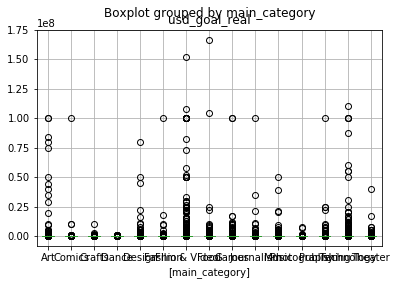

In [36]:
dataDF[["main_category","usd_goal_real"]].boxplot(by="main_category")

We need to count the number of successful projects and find the percentage of all projects that are successful. Then we can find which variales correlate to a high success rate.

In [37]:
def count_success(entries):
    #print(entries)
    successful = 0
    for entry in entries:
        if entry == "successful":
            successful = successful+1
            
    return successful/len(entries)

In [38]:
grouped = dataDF[["main_category", "state"]].groupby(["main_category"], as_index=False, sort=False)
grouped = grouped.aggregate(count_success)
grouped = grouped.rename(columns={"state" : "percent_successful"})
grouped

,main_category,percent_successful
0,Publishing,0.347017
1,Film & Video,0.417906
2,Music,0.526606
3,Food,0.275914
4,Crafts,0.270530
5,Games,0.438905
6,Design,0.415944
7,Comics,0.591415
8,Fashion,0.282832
9,Theater,0.637961


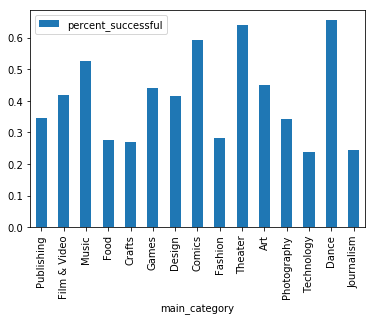

In [39]:
grouped.plot.bar(x="main_category", y="percent_successful")

## Feature Extraction

Create a list of dummy variablese for each categorical variable.

In [40]:
cat_columns = ["main_category", "currency", "state", "country"]
dummy_columns = {}
for col in cat_columns:
    dummies = pd.get_dummies(dataDF[col], prefix=col)
    dummy_columns[col] = dummies.columns.values
    dataDF = dataDF.merge(dummies, left_index=True, right_index=True)
    
dataDF.head()

,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,59,...,0,0,0,0,0,0,0,0,0,0
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,60,...,0,0,0,0,0,0,0,0,0,1
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,45,...,0,0,0,0,0,0,0,0,0,1
3,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,30,...,0,0,0,0,0,0,0,0,0,1
5,Food,NaN,2016-04-01,2016-02-26 13:38:27,successful,224,NaN,52375.0,50000.00,35,...,0,0,0,0,0,0,0,0,0,0


## Set up Experiment

Create training and testing set.

In [41]:
df_train, df_test = train_test_split(dataDF, stratify=dataDF["state"])
print(dataDF.shape, df_train.shape, df_test.shape)

(331675, 64) (248756, 64) (82919, 64)


Use a label encoder to create a training and testing set of just the states of the projects for the base model.

In [42]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train["state"].astype("str"))
y_test = encoder.transform(df_test["state"].astype("str"))
print(y_train[:25])

[1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0]


## Classification

### Simple Logistical Regression Model

Create a base model Simple Logical Regression model using the accuracy and confusion matrix metrics. Accuracy is the correctly classified samples divided by the total number of samples. A confusion matrix is used find why samples are predicted to be 'successful' or 'failed'. Only a diagonal in the matrix means that every prediction was correct.

In [43]:
zeros_train = np.zeros(df_train.shape)
zeros_test = np.zeros(df_test.shape)

base_lr = SGDClassifier(max_iter=1000, loss="log")
base_lr.fit(zeros_train, y_train)
pred_base = base_lr.predict(zeros_test)
pred_probability = base_lr.predict_proba(zeros_test)

base_accuracy = accuracy_score(y_test, pred_base)
base_loss = log_loss(y_test,pred_probability)
cm = confusion_matrix(y_test, pred_base)

print("Base Accuracy:",base_accuracy)
print("Base Loss:", base_loss)
print("Base Labels:", encoder.classes_)
print("Base Confusion Matrix:\n", cm)

c:\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Base Accuracy: 0.5961239281708656
Base Loss: 0.6745523815805905
Base Labels: ['failed' 'successful']
Base Confusion Matrix:
 [[49430     0]
 [33489     0]]


In [ ]:
x_train = df_train[["usd_goal_real"]].astype("float64").values
x_test =df_test[["usd_goal_real"]].astype("float64").values

imputer = SimpleImputer()
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

simple_lr = SGDClassifier(max_iter=10000, loss="log")
simple_lr.fit(x_train,y_train)
pred_state = simple_lr.predict(x_test)
pred_probability = simple_lr.predict_proba(x_test)

null_acc = accuracy_score(y_test,pred_state)
loss = log_loss(y_test, pred_probability)
cm = confusion_matrix(y_test, pred_state)

print("Goal Accuracy:",null_acc)
print("Goal Loss:",loss)
print("Goal Labels:",encoder.classes_)
print("Goal Confusion Matrix:\n",cm)

c:\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Greedy Algorithm Logistical Regression Model

A greedy algorithm will identify the variables that will improve the fit model. Those variables can be used to create the best model to predict the success of a project.

In [ ]:
dataDF.columns[:25]

In [ ]:
num_cols = ["usd_goal_real","duration"]
cat_cols = ["main_category", "currency", "country"]
cand_cols = num_cols + cat_cols

In [ ]:
def create_feature_matrices(df_train, df_test, selected_columns, dummy_columns):
    """
    Creates feature matrices for the training and testing sets from the given dataframes.
    The feature matrices are built from the columns given in selected columns.
    """
    
    # keep track of numerical features
    numerical_trial_columns = []
    
    # keep track of dummy features for categorical variables
    categorical_trial_columns = []
    
    # build feature lists
    for col_name in selected_columns:
        if col_name in dummy_columns:
            categorical_trial_columns.extend(dummy_columns[col_name])
        else:
            numerical_trial_columns.append(col_name)

    # transform numerical features
    if len(numerical_trial_columns) > 0:
        X_train_numerical = df_train[numerical_trial_columns].astype("float64").values
        X_test_numerical = df_test[numerical_trial_columns].astype("float64").values
    
        imputer = SimpleImputer()
        X_train_numerical = imputer.fit_transform(X_train_numerical)
        X_test_numerical = imputer.transform(X_test_numerical)
    
        scaler = StandardScaler()
        X_train_numerical = scaler.fit_transform(X_train_numerical)
        X_test_numerical = scaler.transform(X_test_numerical)
    
    # select categorical features
    if len(categorical_trial_columns) > 0:
        X_train_categorical = df_train[categorical_trial_columns].astype("float64").values
        X_test_categorical = df_test[categorical_trial_columns].astype("float64").values
    
    # concatenate feature matrices
    if len(numerical_trial_columns) > 0 and len(categorical_trial_columns) > 0:
        X_train = np.hstack([X_train_numerical, X_train_categorical])
        X_test = np.hstack([X_test_numerical, X_test_categorical])
    elif len(numerical_trial_columns) > 0:
        X_train = X_train_numerical
        X_test = X_test_numerical
    else:
        X_train = X_train_categorical
        X_test = X_test_categorical
        
    return X_train, X_test

In [ ]:
print("Null Model Accuracy:", base_accuracy)

col_accuracies = []
for col in cand_cols:
    x_train, x_test = create_feature_matrices(df_train,
                                             df_test,
                                             [col],
                                             dummy_columns)
    
    simple_lr = SGDClassifier(max_iter=10000, loss="log")
    simple_lr.fit(x_train, y_train)
    pred_state = simple_lr.predict(x_test)
    pred_probability = simple_lr.predict_proba(x_test)
    accuracy = accuracy_score(y_test, pred_state)
    loss = log_loss(y_test, pred_probability)
    print()
    print(col + " Accuracy:", accuracy)
    print(col + " Loss:", loss)
    col_accuracies.append((accuracy, col))
    
col_accuracies.sort(key=lambda p: p[0], reverse=True)
sorted_columns = [col for _, col in col_accuracies]
print()
print("Sorted columns:" + str(sorted_columns))

In [ ]:
base_model_columns = []
base_loss = loss
base_accuracy = null_acc

print("Base Model Accuracy:", base_accuracy)
print("Base Model Loss:", base_loss)
print()

for col_name in sorted_columns:
    # track all column names
    trial_columns = base_model_columns[:]
    trial_columns.append(col_name)

    X_train, X_test = create_feature_matrices(df_train,
                                             df_test,
                                             trial_columns,
                                             dummy_columns)
    
    trial_lr = SGDClassifier(max_iter=50000, loss="log", penalty="l2")
    trial_lr.fit(X_train, y_train)
    pred_labels = trial_lr.predict(X_test)
    pred_prob = trial_lr.predict_proba(X_test)
    trial_accuracy = accuracy_score(y_test, pred_labels)
    trial_loss = log_loss(y_test, pred_prob)
    print()
    print(str(trial_columns) + " Model Accuracy:", trial_accuracy)
    print(str(trial_columns) + " Model Loss:", trial_loss)

    if trial_accuracy > base_accuracy:
        print("Updating base model")
        base_loss = trial_loss
        base_model_columns = trial_columns
        base_accuracy = trial_accuracy
    print()
    print("Base Model Loss:", base_loss)
    print("Base Model Accuracy:", base_accuracy)
    print()
    
print("Our chosen columns are: " + str(base_model_columns))

In [ ]:
X_train, X_test = create_feature_matrices(df_train,
                                          df_test,
                                          base_model_columns,
                                          dummy_columns)
    
lr_greedy = SGDClassifier(max_iter=10000, loss="log")
lr_greedy.fit(X_train, y_train)
pred_state_greedy = lr_greedy.predict(X_test)
trial_accuracy = accuracy_score(y_test, pred_state_greedy)
cm = confusion_matrix(y_test, pred_state_greedy)
print()
print("Greedy Model Accuracy:", trial_accuracy)
print("Greedy Labels:", encoder.classes_)
print("Greedy Confusion matrix:")
print(cm)

In [ ]:
from sklearn.metrics import roc_curve

pred_proba = lr_greedy.predict_proba(X_test)

# turn multiclass problem into binary problem
pred_proba_1 = 1.0 - pred_proba[:, 0]
y_test_1 = [0 if y == 0 else 1 for y in y_test]

fpr, tpr, _ = roc_curve(y_test_1, pred_proba_1)

plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], [0.0, 1.0])
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

In the hypothesis it was believed that the projects goal and its main category would be the best variables to predict whether a project would be successful or not. That hypothesis was correct in that the goal and the main category were the best predictors. They were the only two variable selected by the greedy algorithm for the model.
The accuracy of the fit is 62.97%. While this is not an amazing result, it is > than 